# Deep Learning Project - Image Classification

In [3]:
import torch
from src.model import ResNet34, ResNet50
from src.train import Trainer
from src.dataset_loader import get_data_loaders

## Loading Data

In [4]:
# Load and check data
train_loader, val_loader, test_loader = get_data_loaders(batch_size=32)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")

# Get class names
class_names = train_loader.dataset.classes
print(f"Classes: {class_names}")

Number of training batches: 23
Number of validation batches: 11
Number of test batches: 10
Classes: ['cat', 'dog']


## Initialize and Train Model

In [5]:
# Initialize model
model = ResNet50(num_classes=1)

# Initialize trainer
trainer = Trainer(
    model=model,
    epochs=50,
    train_loader = train_loader,
    val_loader = val_loader,
    patience=5  # Early stopping patience
)

Using device: cuda


In [6]:
# Train the model
trainer.train()

Epoch 1/50:
Train Loss: 0.9526, Train Acc: 0.5234
Val Loss: 0.7298, Val Acc: 0.1964
Epoch 2/50:
Train Loss: 0.7056, Train Acc: 0.5536
Val Loss: 0.5811, Val Acc: 0.8036
Epoch 3/50:
Train Loss: 0.7342, Train Acc: 0.5261
Val Loss: 0.5288, Val Acc: 0.8036
Epoch 4/50:
Train Loss: 0.7087, Train Acc: 0.5769
Val Loss: 0.5935, Val Acc: 0.8036
Epoch 5/50:
Train Loss: 0.7152, Train Acc: 0.5701
Val Loss: 0.6116, Val Acc: 0.8036
Epoch 6/50:
Train Loss: 0.7320, Train Acc: 0.5755
Val Loss: 0.7913, Val Acc: 0.7887
Epoch 7/50:
Train Loss: 0.6997, Train Acc: 0.5687
Val Loss: 0.5981, Val Acc: 0.7857
Early stopping triggered after epoch 7
Training completed. Best validation accuracy: 0.8036 at epoch 2


## Evaluate on Test Set

<ipython-input-7-576461e77554>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loaded model from epoch 2 with validation accuracy: 0.8036
Classification Report:
              precision    recall  f1-score   support

         cat       0.00      0.00      0.00        66
         dog       0.79      1.00      0.88       250

    accuracy                           0.79       316
   macro avg       0.40      0.50      0.44       316
weighted avg       0.63      0.79      0.70       316



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


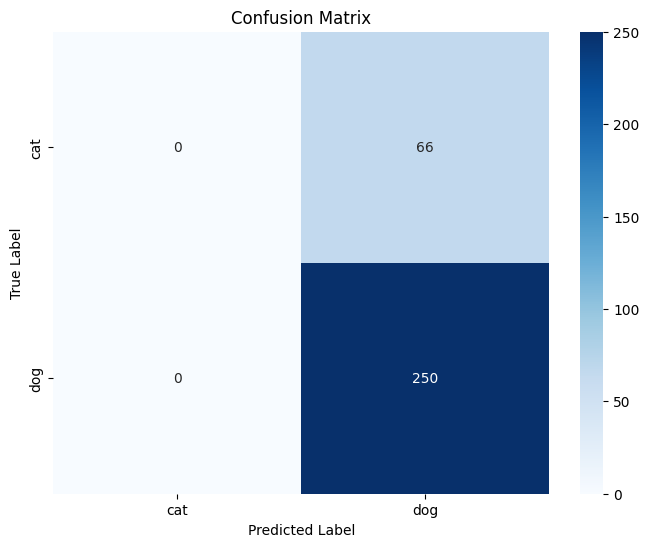

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def evaluate_model(test_loader):

    _, all_preds, all_labels = trainer.evaluate(test_loader)
    # Print classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Load best model
path = 'checkpoints/best_model.pth'
checkpoint = torch.load(path)
trainer.load_model(checkpoint["model_state_dict"])
print(f"Loaded model from epoch {checkpoint['epoch']} with validation accuracy: {checkpoint['best_accuracy']:.4f}")

# Evaluate on test set
evaluate_model( test_loader)